In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../input/the-movies-dataset/movies_metadata.csv')
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [11]:
titles= list(df.original_title)
#type(titles)

In [12]:
titles[:5]

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II']

In [13]:
Frequency={}
for title in titles:
    length=len(title)
    if Frequency.get(length) is None:
        Frequency[length]=1
    else:
        Frequency[length]+=1

In [14]:
Frequency

{9: 2262,
 7: 1773,
 16: 2106,
 17: 2055,
 27: 585,
 4: 1069,
 12: 2398,
 22: 1038,
 5: 1281,
 6: 1536,
 21: 1283,
 10: 2428,
 30: 454,
 11: 2375,
 26: 654,
 15: 2362,
 14: 2435,
 32: 359,
 8: 2000,
 24: 867,
 13: 2443,
 29: 457,
 18: 1901,
 23: 995,
 72: 8,
 34: 285,
 19: 1598,
 39: 153,
 40: 155,
 28: 517,
 3: 482,
 25: 728,
 33: 278,
 20: 1499,
 48: 63,
 43: 92,
 2: 269,
 38: 163,
 35: 223,
 54: 23,
 44: 80,
 58: 25,
 31: 376,
 49: 47,
 36: 213,
 68: 7,
 41: 138,
 37: 174,
 1: 42,
 52: 35,
 50: 53,
 45: 87,
 42: 114,
 56: 25,
 51: 29,
 53: 24,
 55: 28,
 60: 14,
 70: 11,
 46: 69,
 61: 16,
 62: 13,
 47: 59,
 67: 9,
 66: 11,
 104: 2,
 92: 1,
 82: 3,
 77: 2,
 76: 3,
 73: 5,
 63: 13,
 83: 3,
 65: 10,
 71: 7,
 93: 1,
 79: 1,
 75: 3,
 74: 3,
 64: 9,
 57: 22,
 69: 4,
 78: 3,
 59: 10,
 86: 3,
 96: 1,
 90: 1,
 101: 2,
 109: 1,
 88: 1,
 84: 1}

In [19]:
X= np.array(list(Frequency.keys()))
y=np.array(list(Frequency.values()))
print(X,y)

[  9   7  16  17  27   4  12  22   5   6  21  10  30  11  26  15  14  32
   8  24  13  29  18  23  72  34  19  39  40  28   3  25  33  20  48  43
   2  38  35  54  44  58  31  49  36  68  41  37   1  52  50  45  42  56
  51  53  55  60  70  46  61  62  47  67  66 104  92  82  77  76  73  63
  83  65  71  93  79  75  74  64  57  69  78  59  86  96  90 101 109  88
  84] [2262 1773 2106 2055  585 1069 2398 1038 1281 1536 1283 2428  454 2375
  654 2362 2435  359 2000  867 2443  457 1901  995    8  285 1598  153
  155  517  482  728  278 1499   63   92  269  163  223   23   80   25
  376   47  213    7  138  174   42   35   53   87  114   25   29   24
   28   14   11   69   16   13   59    9   11    2    1    3    2    3
    5   13    3   10    7    1    1    3    3    9   22    4    3   10
    3    1    1    2    1    1    1]


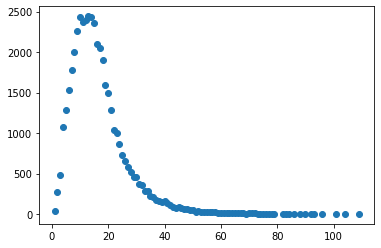

In [21]:
plt.scatter(X,y)
plt.xlabel("No. of characters")
plt.ylabel("No. of Movies")
plt.title("Movie Character length visualization")

In [49]:
X.shape


(91,)

In [58]:
mean=np.mean(y)
std=np.std(y)
print(mean,std)


499.6263736263736 770.212367579594


(array([58.,  8.,  4.,  1.,  3.,  2.,  3.,  2.,  3.,  7.]),
 array([1.0000e+00, 2.4520e+02, 4.8940e+02, 7.3360e+02, 9.7780e+02,
        1.2220e+03, 1.4662e+03, 1.7104e+03, 1.9546e+03, 2.1988e+03,
        2.4430e+03]),
 <a list of 10 Patch objects>)

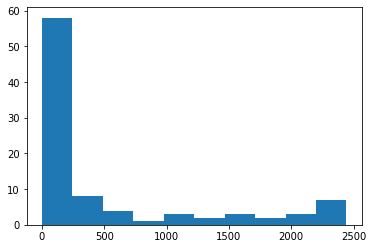

In [59]:
plt.hist(y)